In [1]:
import numpy as np
import multiprocessing

import sys
sys.path.insert(1, '../')

from src.core.gaussian_beam_propagation import FocusedGaussianBeamMC, FocusedGaussianBeam

In [2]:
def all_no_curvature_correction(num_photons, pool):
    num_iterations = 1
    num_trials = 10
    H_over_NA_list = []
    trans_edges_over_NA_list = []
    ax_edges_over_NA_list = []
    beams = []

    for NA in np.arange(0.2, 1.0, 0.1):
        H_over_NA_list.append([])
        trans_edges_over_NA_list.append([])
        ax_edges_over_NA_list.append([])
        
        newbeam = FocusedGaussianBeamMC(num_photons=num_photons, NA=NA, z_f=0,
                                        num_iterations=num_iterations,
                                        curvature_correction=False,
                                        axial_resolution=101, num_steps=100,
                                        trunc_coeff=4, n=1.33,
                                        step_param=None, beam_dist='gaussian')
        rays = np.zeros(shape=(num_iterations, 3, num_photons,
                               newbeam.num_steps))
        paths = np.zeros(shape=(num_iterations, num_photons))
        for trial in range(num_trials):
            

            rays, paths = newbeam.sim(pool)
            print('Ray matrix size:')
            # print(rays.shape)
            H, trans_edges, ax_edges = newbeam.rays_to_intensity(rays)
            # newbeam.save_data(trial, intensity_distribution=H,
            #                   transverse_edges=trans_edges,
            #                   axial_edges=ax_edges, paths=paths)
            H_over_NA_list[-1].append(H)
            trans_edges_over_NA_list[-1].append(trans_edges)
            ax_edges_over_NA_list[-1].append(ax_edges)
        
        beams.append(newbeam)

    return H_over_NA_list, trans_edges_over_NA_list, ax_edges_over_NA_list, beams


with multiprocessing.Pool() as pool:
    H_over_NA_list, trans_edges_over_NA_list, ax_edges_over_NA_list, beams = all_no_curvature_correction(int(1E5), pool)


Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix size:
Ray matrix siz

In [3]:
ave_H_over_NA = [np.mean(H_over_NA_list[i], axis=0) for i in range(len(H_over_NA_list))]
ave_trans_edges_over_NA = [np.mean(trans_edges_over_NA_list[i] , axis=0) for i in range(len(trans_edges_over_NA_list))]
ave_ax_edges_over_NA = [np.mean(ax_edges_over_NA_list[i], axis=0) for i in range(len(ax_edges_over_NA_list))]

In [4]:
ave_axial_int_over_NA = [ave_H_over_NA[i][ave_H_over_NA[i].shape[0]//2] for i in range(len(ave_H_over_NA))]

In [5]:
import matplotlib.pyplot as plt

In [6]:
len(ave_H_over_NA)

8

/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:130: RuntimeWarning: divide by zero encountered in divide
  s1 = (P * alpha**2 * (1-Z) / (2*Z)) + (alpha**2 * eps / (1 + eps**2))
/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:133: RuntimeWarning: invalid value encountered in multiply
  f1 = P**2 * alpha**4 / (4 * Z**2 * (s1**2 + s2**2))
/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:134: RuntimeWarning: invalid value encountered in cos
  f2 = 1 + expit(2*s2) - 2*expit(s2)*np.cos(s1)


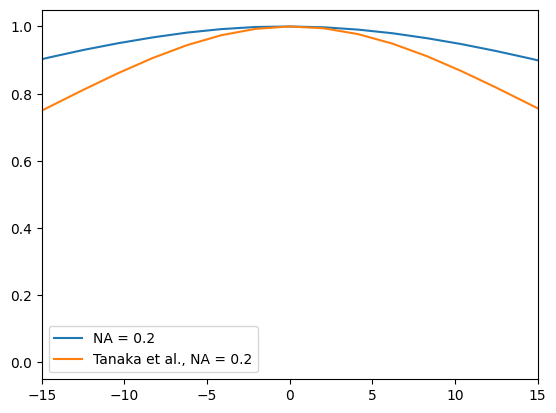

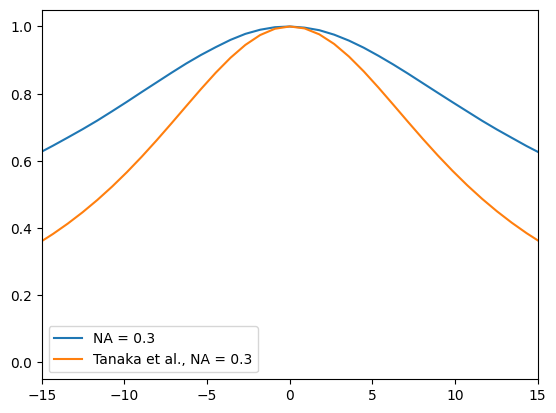

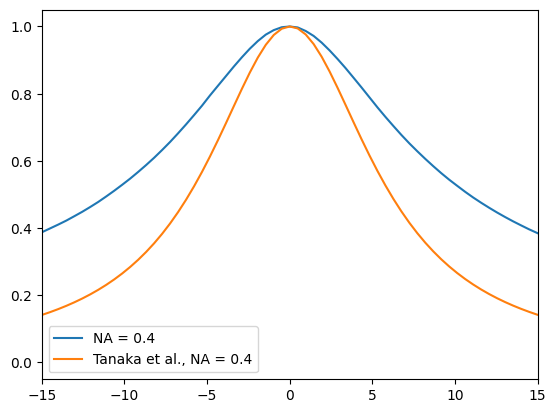

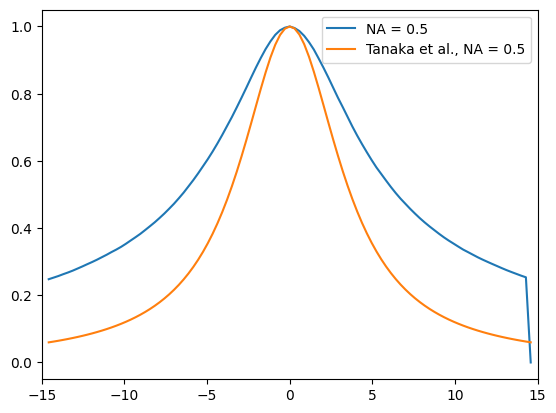

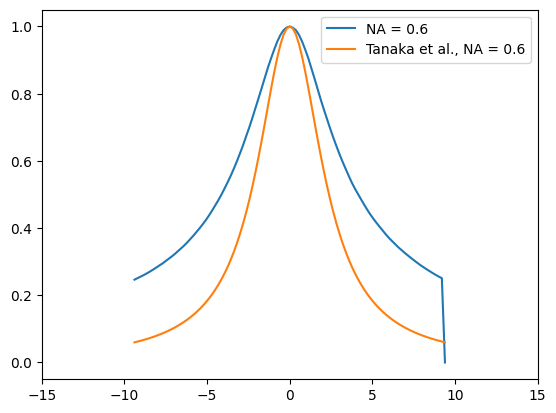

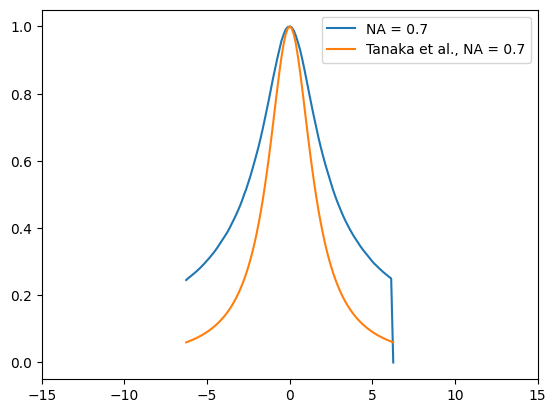

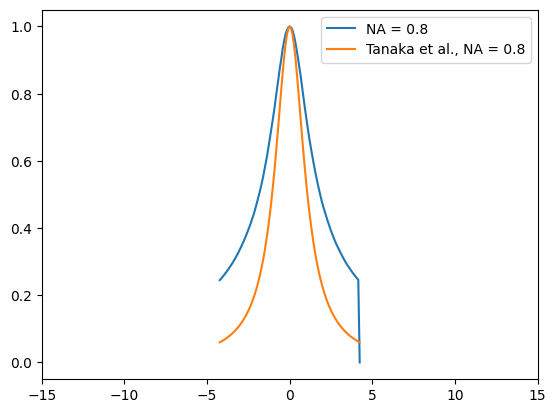

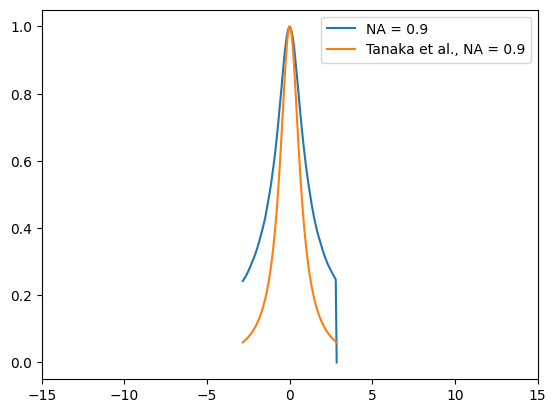

In [18]:
for i in range(len(ave_H_over_NA)):
    plt.figure()
    z = (ave_trans_edges_over_NA[i][:-1] + ave_trans_edges_over_NA[i][1:]) / 2
    normalized_axial_int = ave_axial_int_over_NA[i] / np.max(ave_axial_int_over_NA[i])
    theo_axial_int = beams[i].axial_intensity(z)
    plt.plot(z, normalized_axial_int, label=f'NA = {0.2 + 0.1*i:.1f}')
    plt.plot(z, theo_axial_int, label=f'Tanaka et al., NA = {0.2 + 0.1*i:.1f}')
    plt.legend()
    plt.xlim(-15, 15)